In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("/Users/shubh/Desktop/Completed Courses/Predictive Analytics/Week 2/MNIST-data/mnist_train.csv", header=None)
test = pd.read_csv("/Users/shubh/Desktop/Completed Courses/Predictive Analytics/Week 2/MNIST-data/mnist_test.csv", header=None)

In [3]:
train_data.rename(columns={0:'Labels'})
test.rename(columns={0:'Labels'}).head()

,Labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
PredictTree = pd.DataFrame()
Prediction = pd.DataFrame()
nTrees = 10

In [5]:
# Function to perform training with entropy. 
def train_Tree(X_train, y_train, X_test): 
    #creating a Decision Tree Classifier Object 
    Tree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 50, min_samples_leaf = 10)
    #Train Decision Tree Classifier
    Tree = Tree.fit(X_train, y_train)
    #Predict the response for test dataset
    Prediction = Tree.predict(X_test)
    return Prediction 

In [6]:
for i in range(0, nTrees):
    trainTree1 = pd.DataFrame()
    testTree = pd.DataFrame()
    testTree = pd.DataFrame()
    
    trainTree1 = train_data.sample(n=(int(random.randint(0,70000))),replace=True)
    trainTree0 = trainTree1.iloc[0:, 0]
    #print(trainTree0.head())
    training_set_size = int(random.randint(392,784))
    #print(training_set_size)
    trainTree1 = trainTree1.iloc[0:,1:].sample(training_set_size, axis = 1)
    trainTree1 = pd.concat([trainTree0, trainTree1], axis=1)
    for col in trainTree1.iloc[0:, 1:].columns:
        l = test[col].to_frame()
        testTree = pd.concat([testTree, l], axis=1)
        
    Prediction = pd.DataFrame(train_Tree(trainTree1.iloc[0:, 1:], trainTree1.iloc[0:, 0], testTree.iloc[0:, 0:]))
    PredictTree = pd.concat([PredictTree, Prediction], axis=1)

In [7]:
print(PredictTree.head())

   0  0  0  0  0  0  0  0  0  0
0  7  7  7  7  7  7  7  7  7  7
1  2  2  2  6  2  6  2  2  2  2
2  1  1  1  1  1  1  1  1  1  1
3  0  0  0  0  0  0  0  0  0  0
4  4  4  4  4  4  4  4  4  4  4


In [8]:
FinalPrediction = PredictTree.mode(axis = 1)
FinalPredict = FinalPrediction[0].astype(int)
#print(FinalPredict)

In [9]:
#Confusion Matrix
confusionM = metrics.confusion_matrix(test.iloc[0:, 0], FinalPredict)
print(confusionM)


[[ 963    1    2    0    0    8    3    1    1    1]
 [   0 1115    5    4    0    3    3    1    4    0]
 [  13    8  961    6    9    3    9   12   10    1]
 [   4    4   26  921    1   19    2   14   15    4]
 [   3    7    5    2  910    2    7    0   15   31]
 [  12    5    1   26    5  817    9    6    8    3]
 [  15    4    6    3    7   14  905    0    4    0]
 [   1   11   30    7    6    2    0  959    5    7]
 [   5    2   23   13   14   17   16    3  868   13]
 [   7    4    8   13   26   12    2    8    9  920]]


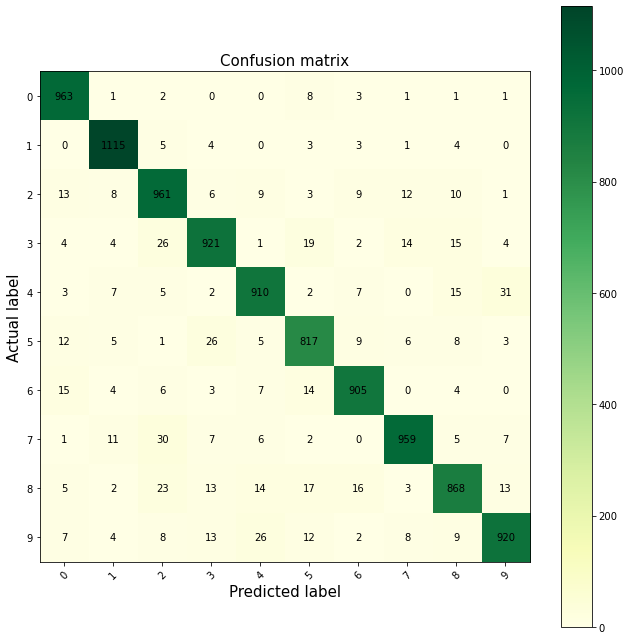

In [10]:
#Visualizing Confusion Matrix
plt.figure(figsize=(9,9))
plt.imshow(confusionM, interpolation='nearest', cmap='YlGn')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = confusionM.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(confusionM[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

In [11]:
diagonal_sum = confusionM.trace()
sum_of_all_elements = confusionM.sum()
accuracy = diagonal_sum / sum_of_all_elements 
print(accuracy)

0.9339
